<a href="https://colab.research.google.com/github/Abhishekranjan28/MyProjects/blob/main/ANNFirst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_train[0][0][0]

array([59, 62, 63], dtype=uint8)

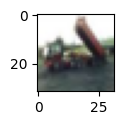

In [4]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])

plot_sample(2)

In [5]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
y_train[3]

array([4], dtype=uint8)

In [8]:
classes[y_train[3][0]]

'deer'

In [9]:
#SCALING THE MODEL BY DIVIDING IT BY 255
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [12]:
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10,dtype="float32"
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10,dtype="float32"
)
y_test_categorical[0:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [14]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation="relu"),
    keras.layers.Dense(3000,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid"),
])
model.compile(optimizer="SGD",loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(X_train_scaled,y_train_categorical,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 228s 146ms/step - loss: 1.8073 - accuracy: 0.3576
Epoch 2/10
1563/1563 [==============================] - 218s 140ms/step - loss: 1.6209 - accuracy: 0.4279
Epoch 3/10
1563/1563 [==============================] - 229s 146ms/step - loss: 1.5390 - accuracy: 0.4559
Epoch 4/10
1563/1563 [==============================] - 220s 141ms/step - loss: 1.4788 - accuracy: 0.4804
Epoch 5/10
1563/1563 [==============================] - 217s 139ms/step - loss: 1.4271 - accuracy: 0.5002
Epoch 6/10
1563/1563 [==============================] - 227s 145ms/step - loss: 1.3841 - accuracy: 0.5128
Epoch 7/10
1563/1563 [==============================] - 219s 140ms/step - loss: 1.3441 - accuracy: 0.5276
Epoch 8/10
1563/1563 [==============================] - 220s 140ms/step - loss: 1.3095 - accuracy: 0.5413
Epoch 9/10
1563/1563 [==============================] - 227s 145ms/step - loss: 1.2759 - accuracy: 0.5517
Epoch 10/10
1563/1563 [=======================

In [15]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 11s 36ms/step


'cat'

In [19]:
classes[y_test[0][0]]

'cat'

In [17]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 12s 36ms/step - loss: 1.4800 - accuracy: 0.4734


[1.480008840560913, 0.4733999967575073]